<a href="https://colab.research.google.com/github/shivamanisuram/machine-learning-algortithms/blob/main/CLASSIFICATION_OF_LFW_IMAGES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time
from sklearn.metrics import accuracy_score



In [4]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)
print(lfw.images.shape)

(1140, 50, 37)


In [7]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [40]:
lfw.data.shape

(1140, 1850)

In [55]:
lfw.images.shape

(1140, 50, 37)

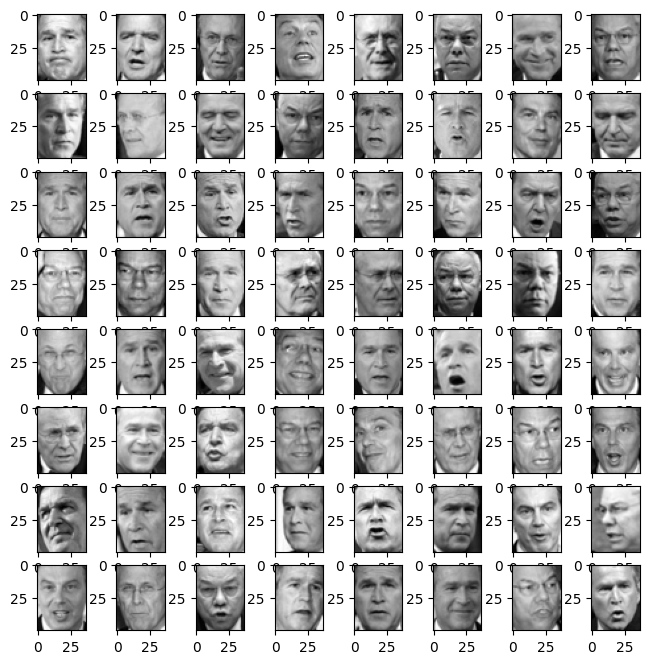

In [41]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(lfw.images[i],cmap='gray')

In [44]:
x,y=lfw.data,lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pca_oli=PCA()
pca_oli.fit(x_train)

PCA()

In [45]:
k=0
total=0
while total<0.99:
  total=total+pca_oli.explained_variance_ratio_[k]
  k=k+1
k


357

In [49]:
pca_lfw=PCA(n_components=k,whiten=True)
x_transformed = pca_lfw.fit_transform(x) # Assign to x_transformed
pca_lfw.fit(x)

PCA(n_components=357, whiten=True)

In [50]:
x_transformed.shape # Access x_transformed

(1140, 357)

In [56]:
x_approx=pca_lfw.inverse_transform(x_transformed)
x_approx=x_approx.reshape(lfw.images.shape)

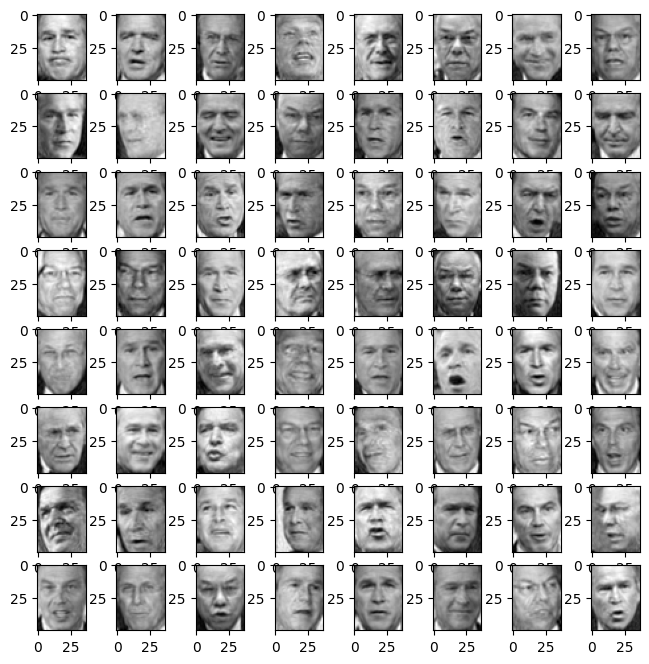

In [52]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(x_approx[i],cmap='gray')

In [53]:
pca_lfw.components_.shape # Use pca_lfw instead of pca
eigenv=pca_lfw.components_.reshape(k,50,37)

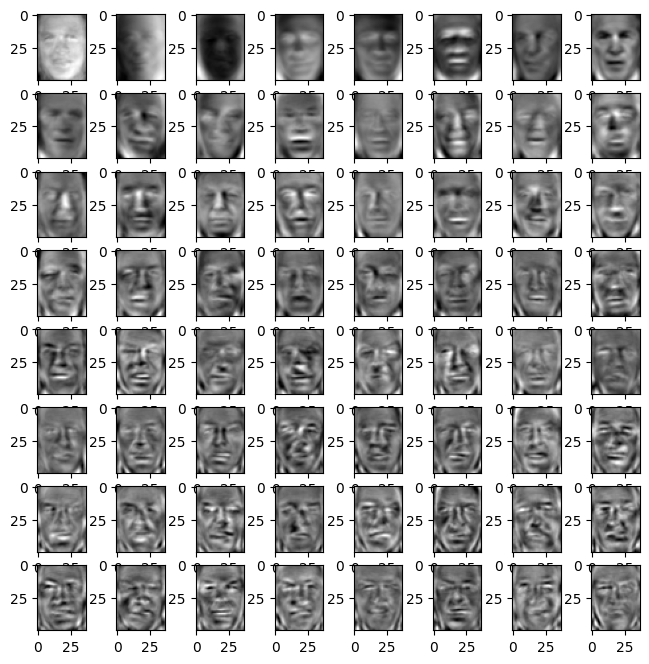

In [54]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
  ax=fig.add_subplot(8,8,i+1)
  ax.imshow(eigenv[i],cmap='gray')

In [63]:
x_train_pca = pca_lfw.fit_transform(x_train)  # Apply PCA only to x_train
x_test_pca = pca_lfw.transform(x_test)       # Transform x_test using the fitted PCA

In [67]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

3.813796281814575
              precision    recall  f1-score   support

           0       0.76      0.64      0.70        61
           1       0.62      0.14      0.23        36
           2       0.58      0.99      0.73       122
           3       0.83      0.16      0.27        31
           4       0.92      0.31      0.47        35

    accuracy                           0.64       285
   macro avg       0.74      0.45      0.48       285
weighted avg       0.69      0.64      0.58       285

[[ 39   1  20   1   0]
 [  6   5  24   0   1]
 [  1   0 121   0   0]
 [  3   2  21   5   0]
 [  2   0  22   0  11]]


In [69]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.911644458770752
2.3269858360290527
              precision    recall  f1-score   support

           0       0.70      0.26      0.38        61
           1       0.00      0.00      0.00        36
           2       0.46      0.99      0.63       122
           3       0.00      0.00      0.00        31
           4       1.00      0.03      0.06        35

    accuracy                           0.48       285
   macro avg       0.43      0.26      0.21       285
weighted avg       0.47      0.48      0.36       285

[[ 16   0  45   0   0]
 [  3   0  33   0   0]
 [  1   0 121   0   0]
 [  2   0  29   0   0]
 [  1   0  33   0   1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
